In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
hints = pd.read_csv("HINTS_erdos.csv")

In [3]:
hints.head()

,HHID,PERSONID,Stratum,APP_REGION,HIGHSPANLI,HISPSURNAME,HISP_HH,Treatment_C2,RUC2003,CENSDIV,...,EducA,EducB,RaceEthn,HHInc,BMI,AgeDX,TimeSinceDX,smokeStat,PHQ4,IncomeRanges_IMP
0,20000035,20000035-01,HM,NaN,2,2,2,1,1,5,...,3,3,2,5,29.0,-1,-1,1,2,7
1,20000044,20000044-01,LM,NaN,2,2,2,1,6,2,...,2,2,2,-9,27.3,-1,-1,2,1,4
2,20000080,20000080-01,HM,NaN,2,2,2,1,1,3,...,4,4,5,5,20.4,-1,-1,1,2,8
3,20000101,20000101-01,HM,NaN,2,2,2,1,1,5,...,4,5,3,5,22.1,-1,-1,3,1,9
4,20000165,20000165-01,HM,NaN,2,2,2,1,4,5,...,-9,-9,2,3,28.9,-1,-1,3,0,5


In [4]:
hints.sample(5, random_state = 123)

,HHID,PERSONID,Stratum,APP_REGION,HIGHSPANLI,HISPSURNAME,HISP_HH,Treatment_C2,RUC2003,CENSDIV,...,EducA,EducB,RaceEthn,HHInc,BMI,AgeDX,TimeSinceDX,smokeStat,PHQ4,IncomeRanges_IMP
2759,20092610,20092610-01,HM,NaN,2,2,2,1,1,5,...,4,4,2,4,26.4,-1,-1,3,0,6
2281,20076487,20076487-03,HM,NaN,2,2,2,1,1,2,...,3,3,2,5,27.4,-1,-1,2,0,8
541,20018816,20018816-01,LM,NaN,2,2,2,1,1,4,...,2,2,2,1,25.8,-1,-1,3,0,2
1373,20046145,20046145-01,HM,NaN,1,1,1,1,1,5,...,3,3,1,4,34.4,-1,-1,3,2,6
3232,20108306,20108306-01,LM,NaN,2,2,2,1,4,3,...,1,1,1,1,26.6,-1,-1,2,2,2


In [5]:
hints =  hints.drop(['APP_REGION', 'PERSONID', 'HHID'], axis=1, inplace=False)

In [30]:
hints.shape

(3630, 354)

In [6]:
#set all the features with numerical values to integers  and character as categorical

# Convert numerical features to integers
numerical_features = hints.select_dtypes(include=['int64', 'float64']).columns
hints[numerical_features] = hints[numerical_features].astype('int32')

# Convert character features to categorical
character_features = hints.select_dtypes(include=['object']).columns
hints[character_features] = hints[character_features].astype('category')

In [7]:
hints

,Stratum,HIGHSPANLI,HISPSURNAME,HISP_HH,Treatment_C2,RUC2003,CENSDIV,CENSREG,FormType,Language_Flag,...,EducA,EducB,RaceEthn,HHInc,BMI,AgeDX,TimeSinceDX,smokeStat,PHQ4,IncomeRanges_IMP
0,HM,2,2,2,1,1,5,3,2,1,...,3,3,2,5,29,-1,-1,1,2,7
1,LM,2,2,2,1,6,2,1,2,1,...,2,2,2,-9,27,-1,-1,2,1,4
2,HM,2,2,2,1,1,3,2,2,1,...,4,4,5,5,20,-1,-1,1,2,8
3,HM,2,2,2,1,1,5,3,2,1,...,4,5,3,5,22,-1,-1,3,1,9
4,HM,2,2,2,1,4,5,3,2,1,...,-9,-9,2,3,28,-1,-1,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,LM,2,2,2,1,2,8,4,2,1,...,1,1,2,1,23,70,4,3,4,3
3626,HM,2,2,2,1,1,5,3,2,1,...,4,5,2,3,25,-1,-1,3,0,5
3627,LM,2,2,2,1,2,2,1,2,1,...,2,2,2,5,29,-1,-1,1,3,7
3628,HM,2,2,2,1,1,5,3,2,1,...,3,3,1,1,23,-1,-1,1,5,2


In [8]:
#turn all values less than 0 to NA in integer type features
hints[numerical_features] = hints[numerical_features].applymap(lambda x: np.nan if x < 0 else x)
hints

,Stratum,HIGHSPANLI,HISPSURNAME,HISP_HH,Treatment_C2,RUC2003,CENSDIV,CENSREG,FormType,Language_Flag,...,EducA,EducB,RaceEthn,HHInc,BMI,AgeDX,TimeSinceDX,smokeStat,PHQ4,IncomeRanges_IMP
0,HM,2,2,2,1,1,5,3,2,1,...,3.0,3.0,2.0,5.0,29.0,NaN,NaN,1.0,2.0,7.0
1,LM,2,2,2,1,6,2,1,2,1,...,2.0,2.0,2.0,NaN,27.0,NaN,NaN,2.0,1.0,4.0
2,HM,2,2,2,1,1,3,2,2,1,...,4.0,4.0,5.0,5.0,20.0,NaN,NaN,1.0,2.0,8.0
3,HM,2,2,2,1,1,5,3,2,1,...,4.0,5.0,3.0,5.0,22.0,NaN,NaN,3.0,1.0,9.0
4,HM,2,2,2,1,4,5,3,2,1,...,NaN,NaN,2.0,3.0,28.0,NaN,NaN,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,LM,2,2,2,1,2,8,4,2,1,...,1.0,1.0,2.0,1.0,23.0,70.0,4.0,3.0,4.0,3.0
3626,HM,2,2,2,1,1,5,3,2,1,...,4.0,5.0,2.0,3.0,25.0,NaN,NaN,3.0,0.0,5.0
3627,LM,2,2,2,1,2,2,1,2,1,...,2.0,2.0,2.0,5.0,29.0,NaN,NaN,1.0,3.0,7.0
3628,HM,2,2,2,1,1,5,3,2,1,...,3.0,3.0,1.0,1.0,23.0,NaN,NaN,1.0,5.0,2.0


In [11]:
# taking features that has no missing values
no_na_features = [col for col in hints.columns if hints[col].isna().sum() == 0]

# Create a subset with only features that have no NAs
hints_no_na = hints[no_na_features]
print(hints_no_na.shape)
# Print the subset
hints_no_na.head()

(3630, 76)


,Stratum,HIGHSPANLI,HISPSURNAME,HISP_HH,Treatment_C2,RUC2003,CENSDIV,CENSREG,FormType,Language_Flag,...,PERSON_FINWT44,PERSON_FINWT45,PERSON_FINWT46,PERSON_FINWT47,PERSON_FINWT48,PERSON_FINWT49,PERSON_FINWT50,VAR_STRATUM,VAR_CLUSTER,UpdateDate
0,HM,2,2,2,1,1,5,3,2,1,...,47533,45855,50089,47074,47204,46699,46911,42_HM,2,2012-10-17
1,LM,2,2,2,1,6,2,1,2,1,...,56701,54063,55291,57274,55261,53879,53618,42_LM,13,2012-10-17
2,HM,2,2,2,1,1,3,2,2,1,...,30929,31176,31074,31444,30633,32640,32491,42_HM,25,2012-10-19
3,HM,2,2,2,1,1,5,3,2,1,...,9037,8730,9202,9042,9122,9146,8823,42_HM,19,2012-11-09
4,HM,2,2,2,1,4,5,3,2,1,...,35172,34687,36513,35244,34353,35515,35609,42_HM,38,2012-10-16


In [12]:
hints_no_na.loc[:,'EverHadCancer'] = hints['EverHadCancer']

/var/folders/pj/smtb5qn15451pgf_1y_gw7k00000gn/T/ipykernel_4515/1632994281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hints_no_na.loc[:,'EverHadCancer'] = hints['EverHadCancer']


In [13]:
print(hints_no_na.shape)
hints_no_na

(3630, 77)


,Stratum,HIGHSPANLI,HISPSURNAME,HISP_HH,Treatment_C2,RUC2003,CENSDIV,CENSREG,FormType,Language_Flag,...,PERSON_FINWT45,PERSON_FINWT46,PERSON_FINWT47,PERSON_FINWT48,PERSON_FINWT49,PERSON_FINWT50,VAR_STRATUM,VAR_CLUSTER,UpdateDate,EverHadCancer
0,HM,2,2,2,1,1,5,3,2,1,...,45855,50089,47074,47204,46699,46911,42_HM,2,2012-10-17,2.0
1,LM,2,2,2,1,6,2,1,2,1,...,54063,55291,57274,55261,53879,53618,42_LM,13,2012-10-17,2.0
2,HM,2,2,2,1,1,3,2,2,1,...,31176,31074,31444,30633,32640,32491,42_HM,25,2012-10-19,2.0
3,HM,2,2,2,1,1,5,3,2,1,...,8730,9202,9042,9122,9146,8823,42_HM,19,2012-11-09,2.0
4,HM,2,2,2,1,4,5,3,2,1,...,34687,36513,35244,34353,35515,35609,42_HM,38,2012-10-16,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,LM,2,2,2,1,2,8,4,2,1,...,76884,79025,81606,81455,77053,78170,42_LM,3,2012-11-27,1.0
3626,HM,2,2,2,1,1,5,3,2,1,...,23402,23515,23613,22615,23732,23505,42_HM,13,2012-10-23,2.0
3627,LM,2,2,2,1,2,2,1,2,1,...,141060,137864,142516,0,132742,137698,42_LM,48,2012-11-20,2.0
3628,HM,2,2,2,1,1,5,3,2,1,...,79705,82697,78922,79669,81381,79548,42_HM,32,2012-11-05,2.0


In [14]:
hints_no_na.EverHadCancer.value_counts()

EverHadCancer
2.0    3135
1.0     464
Name: count, dtype: int64

In [15]:
hints_no_na.loc[hints_no_na.EverHadCancer == 1, 'EverHadCancer'] = "Yes"
hints_no_na.loc[hints_no_na.EverHadCancer == 2, 'EverHadCancer'] = "No"

In [16]:
hints_no_na.EverHadCancer.value_counts()

EverHadCancer
No     3135
Yes     464
Name: count, dtype: int64

In [17]:
hints_no_na.head()

,Stratum,HIGHSPANLI,HISPSURNAME,HISP_HH,Treatment_C2,RUC2003,CENSDIV,CENSREG,FormType,Language_Flag,...,PERSON_FINWT45,PERSON_FINWT46,PERSON_FINWT47,PERSON_FINWT48,PERSON_FINWT49,PERSON_FINWT50,VAR_STRATUM,VAR_CLUSTER,UpdateDate,EverHadCancer
0,HM,2,2,2,1,1,5,3,2,1,...,45855,50089,47074,47204,46699,46911,42_HM,2,2012-10-17,No
1,LM,2,2,2,1,6,2,1,2,1,...,54063,55291,57274,55261,53879,53618,42_LM,13,2012-10-17,No
2,HM,2,2,2,1,1,3,2,2,1,...,31176,31074,31444,30633,32640,32491,42_HM,25,2012-10-19,No
3,HM,2,2,2,1,1,5,3,2,1,...,8730,9202,9042,9122,9146,8823,42_HM,19,2012-11-09,No
4,HM,2,2,2,1,4,5,3,2,1,...,34687,36513,35244,34353,35515,35609,42_HM,38,2012-10-16,No


In [18]:
hints_no_na.groupby("EverHadCancer").PERSON_FINWT50.mean()

EverHadCancer
No     69181.177671
Yes    41713.129310
Name: PERSON_FINWT50, dtype: float64

In [19]:
hints_no_na.groupby("EverHadCancer").describe()

HIGHSPANLI                                              \
                   count      mean      std  min  25%  50%  75%  max   
EverHadCancer                                                          
No                3135.0  1.981818  0.13363  1.0  2.0  2.0  2.0  2.0   
Yes                464.0  1.982759  0.13031  1.0  2.0  2.0  2.0  2.0   

              HISPSURNAME            ... PERSON_FINWT50             \
                    count      mean  ...            75%        max   
EverHadCancer                        ...                             
No                 3135.0  1.887081  ...       81234.00  1563208.0   
Yes                 464.0  1.922414  ...       54288.75   422435.0   

              VAR_CLUSTER                                                     
                    count       mean        std  min   25%   50%   75%   max  
EverHadCancer                                                                 
No                 3135.0  25.314514  14.341579  1.0  13.0  26.0  38.0  50.0  
Yes                 464.0  25.060345  14.117091  1.0  13.0  25.0  37.0  50.0  

[2 rows x 536 columns]

In [20]:
from pandas.plotting import scatter_matrix

In [21]:
#scatter_matrix(hints_no_na)

In [22]:
#  plot to show how many NA's each feature has
import matplotlib.pyplot as plt
import missingno as msno

In [23]:
hints_no_na.head

<bound method NDFrame.head of      Stratum  HIGHSPANLI  HISPSURNAME  HISP_HH  Treatment_C2  RUC2003  \
0         HM           2            2        2             1        1   
1         LM           2            2        2             1        6   
2         HM           2            2        2             1        1   
3         HM           2            2        2             1        1   
4         HM           2            2        2             1        4   
...      ...         ...          ...      ...           ...      ...   
3625      LM           2            2        2             1        2   
3626      HM           2            2        2             1        1   
3627      LM           2            2        2             1        2   
3628      HM           2            2        2             1        1   
3629      HM           2            2        2             1        1   

      CENSDIV  CENSREG  FormType  Language_Flag  ...  PERSON_FINWT45  \
0           5        

In [107]:
hints_no_na.columns

Index(['Stratum', 'HIGHSPANLI', 'HISPSURNAME', 'HISP_HH', 'Treatment_C2',
       'RUC2003', 'CENSDIV', 'CENSREG', 'FormType', 'Language_Flag', 'QDisp',
       'AdultsInHH', 'SeekHealthInfo', 'WhereSeekHealthInfo_OS',
       'StrongNeedCancerInfo_OS', 'Internet_OtherOS',
       'InternetCancerInfoSite_OS', 'Height_Inches', 'CaOther_OS',
       'OccupationStatus_OS', 'MultiOcc', 'HHAdults_Num', 'PERSON_FINWT0',
       'PERSON_FINWT1', 'PERSON_FINWT2', 'PERSON_FINWT3', 'PERSON_FINWT4',
       'PERSON_FINWT5', 'PERSON_FINWT6', 'PERSON_FINWT7', 'PERSON_FINWT8',
       'PERSON_FINWT9', 'PERSON_FINWT10', 'PERSON_FINWT11', 'PERSON_FINWT12',
       'PERSON_FINWT13', 'PERSON_FINWT14', 'PERSON_FINWT15', 'PERSON_FINWT16',
       'PERSON_FINWT17', 'PERSON_FINWT18', 'PERSON_FINWT19', 'PERSON_FINWT20',
       'PERSON_FINWT21', 'PERSON_FINWT22', 'PERSON_FINWT23', 'PERSON_FINWT24',
       'PERSON_FINWT25', 'PERSON_FINWT26', 'PERSON_FINWT27', 'PERSON_FINWT28',
       'PERSON_FINWT29', 'PERSON_FINWT30', 

In [111]:
hints_no_na['VAR_STRATUM'].describe

<bound method NDFrame.describe of 0       42_HM
1       42_LM
2       42_HM
3       42_HM
4       42_HM
        ...  
3625    42_LM
3626    42_HM
3627    42_LM
3628    42_HM
3629    42_HM
Name: VAR_STRATUM, Length: 3599, dtype: category
Categories (3, object): ['42_CA', '42_HM', '42_LM']>

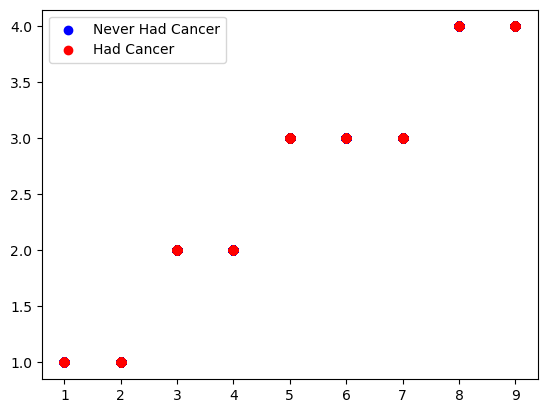

In [25]:

plt.scatter(hints_no_na.loc[hints_no_na.EverHadCancer=="No"].CENSDIV,
           hints_no_na.loc[hints_no_na.EverHadCancer=="No"].CENSREG,
            c='b', label="Never Had Cancer")
plt.scatter(hints_no_na.loc[hints_no_na.EverHadCancer=="Yes"].CENSDIV,
           hints_no_na.loc[hints_no_na.EverHadCancer=="Yes"].CENSREG,
            c='r', label="Had Cancer")

plt.legend()
plt.show()

In [112]:
# cross table
ct_DIV = pd.crosstab(hints_no_na['VAR_STRATUM'], hints_no_na['EverHadCancer'])
print(ct_DIV)
ct_DIV = pd.crosstab(hints_no_na['VAR_STRATUM'], hints_no_na['EverHadCancer'], normalize='index')
ct_DIV



EverHadCancer    No  Yes
VAR_STRATUM             
42_CA            49   11
42_HM          1660  193
42_LM          1426  260


EverHadCancer,No,Yes
VAR_STRATUM,,
42_CA,0.816667,0.183333
42_HM,0.895845,0.104155
42_LM,0.845789,0.154211


In [27]:
ct_REG = pd.crosstab(hints_no_na['CENSREG'], hints_no_na['EverHadCancer'])
print(ct_REG)
ct_REG = pd.crosstab(hints_no_na['CENSREG'], hints_no_na['EverHadCancer'], normalize='index')
ct_REG

EverHadCancer    No  Yes
CENSREG                 
1               469   86
2               589   90
3              1347  180
4               730  108


EverHadCancer,No,Yes
CENSREG,,
1,0.845045,0.154955
2,0.867452,0.132548
3,0.882122,0.117878
4,0.871122,0.128878


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
hints_no_na = hints_no_na.dropna()

In [30]:
hints_no_na.shape

(3599, 77)

In [88]:
### Class balancing
class_count_0, class_count_1 = hints_no_na['EverHadCancer'].value_counts()
class_count_1

464

In [89]:
class_0 = hints_no_na[hints_no_na['EverHadCancer'] == "No"]
class_1 = hints_no_na[hints_no_na['EverHadCancer'] == "Yes"]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (3135, 77)
class 1: (464, 77)


In [91]:
#Random Under-Sampling
#class_count_1
class_0_under = class_0.sample(class_count_1)
balanced = pd.concat([class_0_under, class_1], axis=0)
print(train1.shape)
train1['EverHadCancer'].value_counts()

(928, 77)


EverHadCancer
No     464
Yes    464
Name: count, dtype: int64

In [93]:
train, test = train_test_split(balanced, 
                              random_state=123,
                              shuffle=True,
                              test_size=0.2,
                              stratify=balanced['EverHadCancer'])

In [94]:
train.head()

,Stratum,HIGHSPANLI,HISPSURNAME,HISP_HH,Treatment_C2,RUC2003,CENSDIV,CENSREG,FormType,Language_Flag,...,PERSON_FINWT45,PERSON_FINWT46,PERSON_FINWT47,PERSON_FINWT48,PERSON_FINWT49,PERSON_FINWT50,VAR_STRATUM,VAR_CLUSTER,UpdateDate,EverHadCancer
2365,HM,2,2,2,1,1,5,3,2,1,...,66234,58862,65457,60716,60582,65464,42_HM,29,2013-01-04,No
3581,LM,2,2,2,1,4,2,1,2,1,...,56119,60137,58393,60472,60307,56922,42_LM,3,2012-10-22,Yes
2400,LM,2,2,2,1,3,3,2,2,1,...,25977,0,25853,25941,27105,25172,42_LM,46,2013-01-07,Yes
1589,HM,2,2,2,1,1,9,4,2,1,...,17773,17893,17997,18772,17006,17361,42_HM,15,2012-12-13,No
2925,HM,2,2,2,1,1,8,4,2,1,...,31533,31439,31921,31630,31678,31162,42_HM,31,2012-10-22,No


In [96]:
#train1 = train.sample(450, random_state=123)
#train1.shape
print(test.EverHadCancer.value_counts())
print(train.EverHadCancer.value_counts())

EverHadCancer
No     93
Yes    93
Name: count, dtype: int64
EverHadCancer
No     371
Yes    371
Name: count, dtype: int64


In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [100]:
features = balanced.select_dtypes(include=['int64', 'float64']).columns
knn_pipe = Pipeline([('scale', StandardScaler()),('knn', KNeighborsClassifier(5))])
knn_pipe.fit(train[features],
            train.EverHadCancer)

Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [102]:
features

Index(['HIGHSPANLI', 'HISPSURNAME', 'HISP_HH', 'Treatment_C2', 'RUC2003',
       'CENSDIV', 'CENSREG', 'FormType', 'Language_Flag', 'QDisp',
       'AdultsInHH', 'SeekHealthInfo', 'Height_Inches', 'MultiOcc',
       'HHAdults_Num', 'PERSON_FINWT0', 'PERSON_FINWT1', 'PERSON_FINWT2',
       'PERSON_FINWT3', 'PERSON_FINWT4', 'PERSON_FINWT5', 'PERSON_FINWT6',
       'PERSON_FINWT7', 'PERSON_FINWT8', 'PERSON_FINWT9', 'PERSON_FINWT10',
       'PERSON_FINWT11', 'PERSON_FINWT12', 'PERSON_FINWT13', 'PERSON_FINWT14',
       'PERSON_FINWT15', 'PERSON_FINWT16', 'PERSON_FINWT17', 'PERSON_FINWT18',
       'PERSON_FINWT19', 'PERSON_FINWT20', 'PERSON_FINWT21', 'PERSON_FINWT22',
       'PERSON_FINWT23', 'PERSON_FINWT24', 'PERSON_FINWT25', 'PERSON_FINWT26',
       'PERSON_FINWT27', 'PERSON_FINWT28', 'PERSON_FINWT29', 'PERSON_FINWT30',
       'PERSON_FINWT31', 'PERSON_FINWT32', 'PERSON_FINWT33', 'PERSON_FINWT34',
       'PERSON_FINWT35', 'PERSON_FINWT36', 'PERSON_FINWT37', 'PERSON_FINWT38',
       'PERSO

In [103]:
pred = knn_pipe.predict(test[features])
pred

array(['Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 

In [104]:
def accuracy(true, predicted):
    return np.sum(true==predicted)/len(predicted)

In [105]:
print("Accuracy: ", accuracy(test.EverHadCancer, pred))

Accuracy:  0.5698924731182796


In [106]:
knn_pipe.predict_proba(train[features])

array([[0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       ...,
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4]])

In [42]:
hints_no_na.columns

Index(['Stratum', 'HIGHSPANLI', 'HISPSURNAME', 'HISP_HH', 'Treatment_C2',
       'RUC2003', 'CENSDIV', 'CENSREG', 'FormType', 'Language_Flag', 'QDisp',
       'AdultsInHH', 'SeekHealthInfo', 'WhereSeekHealthInfo_OS',
       'StrongNeedCancerInfo_OS', 'Internet_OtherOS',
       'InternetCancerInfoSite_OS', 'Height_Inches', 'CaOther_OS',
       'OccupationStatus_OS', 'MultiOcc', 'HHAdults_Num', 'PERSON_FINWT0',
       'PERSON_FINWT1', 'PERSON_FINWT2', 'PERSON_FINWT3', 'PERSON_FINWT4',
       'PERSON_FINWT5', 'PERSON_FINWT6', 'PERSON_FINWT7', 'PERSON_FINWT8',
       'PERSON_FINWT9', 'PERSON_FINWT10', 'PERSON_FINWT11', 'PERSON_FINWT12',
       'PERSON_FINWT13', 'PERSON_FINWT14', 'PERSON_FINWT15', 'PERSON_FINWT16',
       'PERSON_FINWT17', 'PERSON_FINWT18', 'PERSON_FINWT19', 'PERSON_FINWT20',
       'PERSON_FINWT21', 'PERSON_FINWT22', 'PERSON_FINWT23', 'PERSON_FINWT24',
       'PERSON_FINWT25', 'PERSON_FINWT26', 'PERSON_FINWT27', 'PERSON_FINWT28',
       'PERSON_FINWT29', 'PERSON_FINWT30', 

In [113]:
hints_no_na.UpdateDate

0       2012-10-17
1       2012-10-17
2       2012-10-19
3       2012-11-09
4       2012-10-16
           ...    
3625    2012-11-27
3626    2012-10-23
3627    2012-11-20
3628    2012-11-05
3629    2012-10-22
Name: UpdateDate, Length: 3599, dtype: category
Categories (50, object): ['2012-10-15', '2012-10-16', '2012-10-17', '2012-10-19', ..., '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-11']